<a href="https://colab.research.google.com/github/Menna0Ameen/Advanced-Neural-Network-Q-Learning-project-/blob/main/Advanced_neuralnetwork2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation  # 🧩 for animation


In [73]:
class GridWorld:
    def __init__(self):
        self.size = 4
        self.goal = (3, 3)
        self.reset()

    def reset(self):
        self.pos = (0, 0)
        return self.pos

    def step(self, action):
        x, y = self.pos
        if action == 0:    # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(self.size - 1, y + 1)
        elif action == 2:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)

        next_pos = (x, y)
        reward = -1
        done = False

        if next_pos == self.goal:
            reward = 10
            done = True

        self.pos = next_pos
        return next_pos, reward, done


In [74]:
#CASE1
import numpy as np
import random

env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for step in range(max_steps):
        s_idx = state_to_index(state)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


In [75]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):
    row = ""
    for j in range(4):
        state = i * 4 + j
        if (i, j) == env.goal:
            row += " G  "
        else:
            best_action = np.argmax(q_table[state])
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 ↓   ↓   ↓   ↓  
 ↓   ↓   ↓   ↓  
 →   →   ↓   ↓  
 →   →   →   G  


In [76]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [77]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


In [78]:
print("Agent path:", path)

Agent path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]


In [79]:
print(q_table)

[[ 0.55245426  1.5667383   1.8098      0.5726221 ]
 [-1.60623919 -0.08019088  3.06721191 -1.59406156]
 [-0.96968339  0.33477738  2.81396901 -1.53017394]
 [-0.55245981 -0.49673557  3.10867309 -1.17416655]
 [ 0.57838557  3.08597223  3.122       1.76000319]
 [-0.54741187  3.14916772  4.57995274  1.3576432 ]
 [-0.41405826  3.666197    6.17881608  1.07209295]
 [-0.32079794  2.51207982  7.40711734  1.45290302]
 [ 1.72612477  4.58        4.4979704   3.02360978]
 [ 3.04966635  6.2         6.18473107  3.09114505]
 [ 4.4194578   7.7849575   8.          4.46251755]
 [ 3.65668978  4.99382608  9.97534965  3.7959376 ]
 [ 1.78621333  6.18975423  2.68752709  2.34007183]
 [ 3.37213103  7.99999773  5.43977804  3.56951671]
 [ 6.14305761 10.          7.95154879  6.17013173]
 [ 0.          0.          0.          0.        ]]


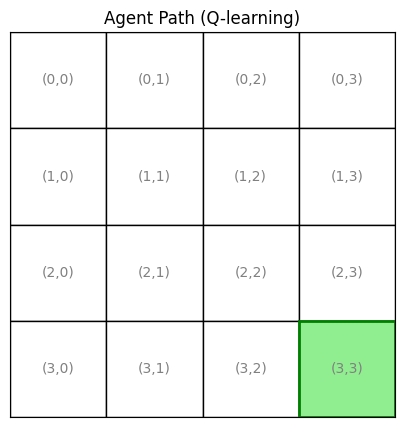

In [80]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

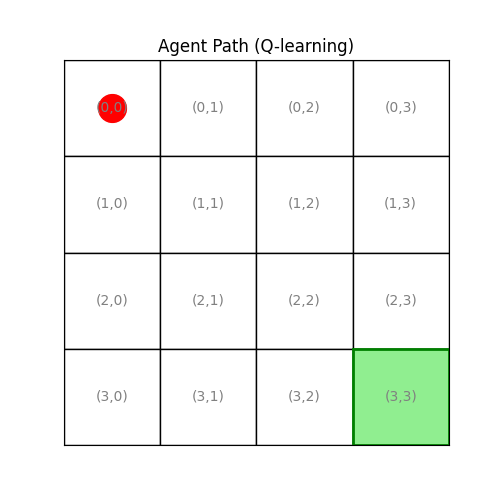

In [81]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
#CASE2
import numpy as np
import random

env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.5
gamma = 0.95
epsilon = 0.1
min_epsilon = 0.01
epsilon_decay = 0.995

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for step in range(max_steps):
        s_idx = state_to_index(state)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


In [ ]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):
    row = ""
    for j in range(4):
        state = i * 4 + j
        if (i, j) == env.goal:
            row += " G  "
        else:
            best_action = np.argmax(q_table[state])
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 ↓   ↓   ←   ↑  
 ↓   ↓   ↓   ↓  
 →   →   →   ↓  
 →   ↑   ↑   G  


In [ ]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


In [ ]:
print("Agent path:", path)

Agent path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


In [ ]:
print(q_table)

[[ 1.91787724  3.01153899  3.21342812  1.91103217]
 [-0.57121928 -1.5846875   4.41081988 -1.84680362]
 [-1.23125    -1.35       -1.23125    -0.9875    ]
 [-0.9875     -0.9875     -1.1125     -0.9875    ]
 [ 1.99643435  4.41658941  4.4351875   3.19701825]
 [-1.90352661 -0.9875      5.72124952 -1.1953125 ]
 [-1.10625    -1.10625     7.05136583 -0.9875    ]
 [-0.9875     -0.9875      8.35546875 -0.9875    ]
 [ 2.89236735  5.72125     1.43687846  4.40195923]
 [ 4.34104291  7.075       4.13596532  3.88078906]
 [ 5.5149617   8.5         3.68335937  4.2909375 ]
 [ 6.1328125   7.9375     10.          6.96445312]
 [-0.5         3.91047411  0.          0.        ]
 [ 5.71500092  0.          0.          0.        ]
 [ 6.6328125   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


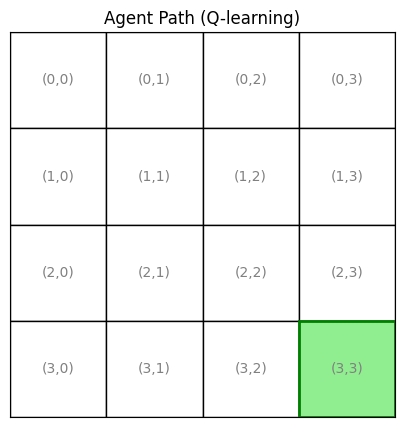

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

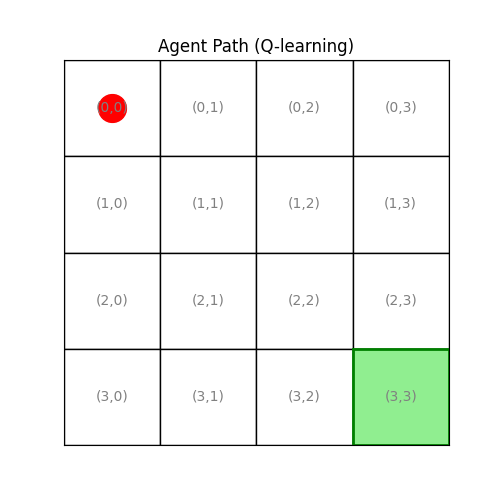

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
#CASE3
import numpy as np
import random

env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.9
gamma = 0.99
epsilon = 0.5
min_epsilon = 0.5
epsilon_decay =

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for step in range(max_steps):
        s_idx = state_to_index(state)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


In [ ]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):
    row = ""
    for j in range(4):
        state = i * 4 + j
        if (i, j) == env.goal:
            row += " G  "
        else:
            best_action = np.argmax(q_table[state])
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 →   →   →   ↓  
 →   →   →   ↓  
 →   →   →   ↓  
 →   →   →   G  


In [ ]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


In [ ]:
print("Agent path:", path)

Agent path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]


In [ ]:
print(q_table)

[[ 3.56281643  4.60890549  4.60890549  3.56281643]
 [ 4.60890549  5.6655611   5.6655611   3.56281643]
 [ 5.6655611   6.73289     6.73289     4.60890549]
 [ 6.73289     6.73289     7.811       5.6655611 ]
 [ 3.56281643  5.6655611   5.6655611   4.60890549]
 [ 4.60890549  6.73289     6.73289     4.60890549]
 [ 5.6655611   7.811       7.811       5.6655611 ]
 [ 6.73289     7.811       8.9         6.73289   ]
 [ 4.60890549  6.73289     6.73287057  5.6655611 ]
 [ 5.6655611   7.811       7.811       5.6655611 ]
 [ 6.73289     8.9         8.9         6.73289   ]
 [ 7.811       8.9        10.          7.811     ]
 [ 5.66556109  7.811       6.49970686  6.73266376]
 [ 6.73288915  8.9         7.81099997  6.73289   ]
 [ 7.811      10.          8.9         7.811     ]
 [ 0.          0.          0.          0.        ]]


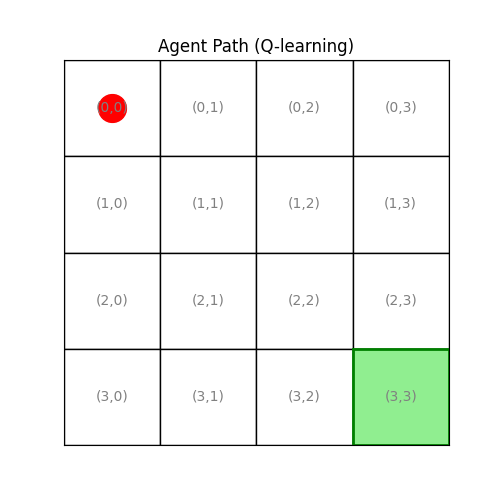

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

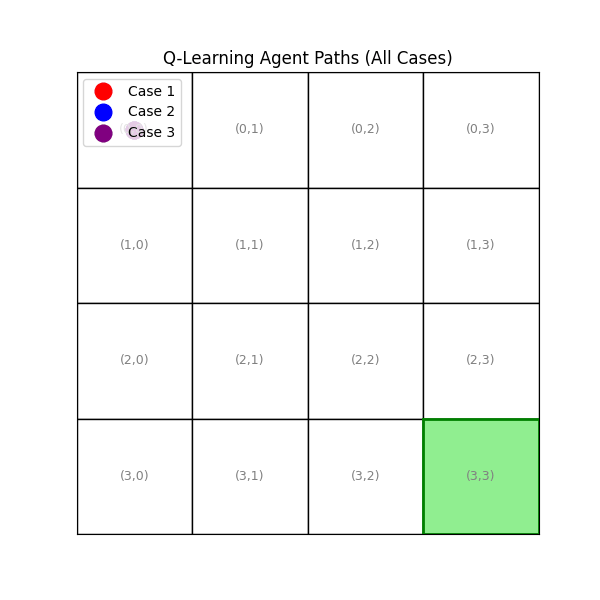

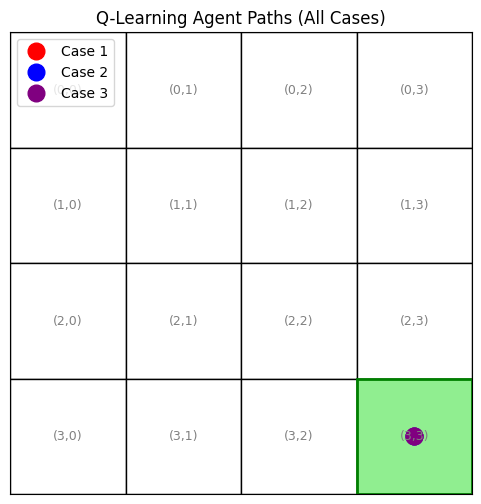

In [84]:
# Install Pillow if needed
!pip install -q pillow

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# ------------------------
# Define paths for 3 cases
# ------------------------
path_case1 = [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3)]
path_case2 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]
path_case3 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]

paths = {
    'Case 1': path_case1,
    'Case 2': path_case2,
    'Case 3': path_case3,
}
colors = {
    'Case 1': 'red',
    'Case 2': 'blue',
    'Case 3': 'purple',
}

# ------------------------
# Setup plot
# ------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title("Q-Learning Agent Paths (All Cases)")

# Draw grid with labels
for i in range(4):
    for j in range(4):
        rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=9, color='gray')

# Mark goal cell
goal = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
ax.add_patch(goal)

# ------------------------
# Create agent circles
# ------------------------
agents = {}
for case in paths:
    agents[case], = ax.plot([], [], 'o', color=colors[case], markersize=12, label=case)

# Add legend
ax.legend(loc='upper left')

# Max frames
max_len = max(len(p) for p in paths.values())

# ------------------------
# Animation update function
# ------------------------
def update(frame):
    for case_name, path in paths.items():
        if frame < len(path):
            x, y = path[frame]
            agents[case_name].set_data([y + 0.5], [3.5 - x])  # ✅ Wrapped in brackets
    return list(agents.values())

# Animate
anim = FuncAnimation(fig, update, frames=max_len, interval=800, blit=True)

# ------------------------
# Save and show as GIF
# ------------------------
gif_path = "/content/all_cases_one_grid.gif"
anim.save(gif_path, writer='pillow')
Image(filename=gif_path)


In [ ]:
configs = [
    {'alpha': 0.1, 'gamma': 0.9,  'epsilon_start': 1.0, 'epsilon_end': 0.01, 'decay': 0.995, 'label': 'CASE 1'},
    {'alpha': 0.5, 'gamma': 0.95, 'epsilon_start': 1.0, 'epsilon_end': 0.1,  'decay': 0.995, 'label': 'CASE 2'},
    {'alpha': 0.9, 'gamma': 0.99, 'epsilon_start': 0.5, 'epsilon_end': 0.5,  'decay': 1.0,   'label': 'CASE 3'},  # constant ε
]


In [ ]:
all_rewards = {}
all_steps = {}

for cfg in configs:
    alpha = cfg['alpha']
    gamma = cfg['gamma']
    epsilon = cfg['epsilon_start']
    min_epsilon = cfg['epsilon_end']
    decay = cfg['decay']
    label = cfg['label']

    q_table = np.zeros((16, 4))
    rewards_per_episode = []
    steps_to_goal = []

    for episode in range(1000):
        state = env.reset()
        total_reward = 0
        steps = 0

        for step in range(50):
            s_idx = state_to_index(state)
            if np.random.rand() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(q_table[s_idx])

            next_state, reward, done = env.step(action)
            ns_idx = state_to_index(next_state)

            q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
            state = next_state

            total_reward += reward
            steps += 1
            if done:
                break

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)
        steps_to_goal.append(steps if reward == 10 else 50)

    all_rewards[label] = rewards_per_episode
    all_steps[label] = steps_to_goal


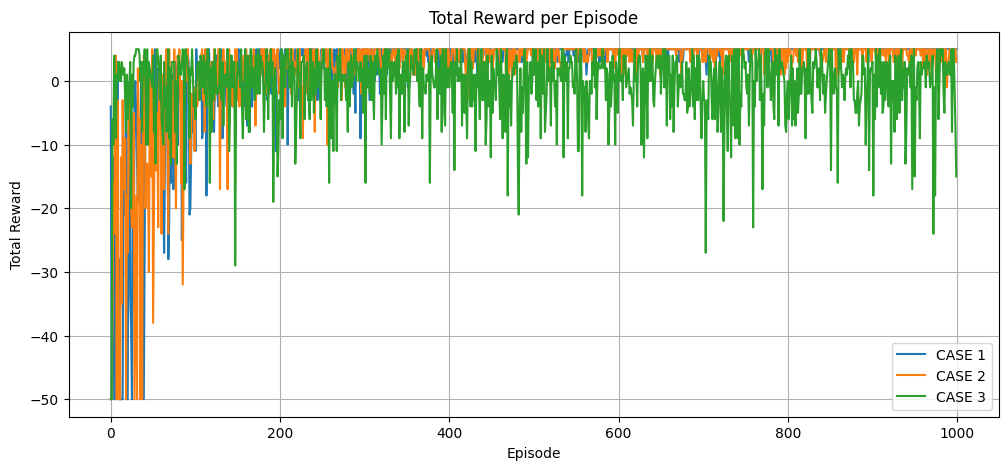

In [ ]:
plt.figure(figsize=(12, 5))
for label, rewards in all_rewards.items():
    plt.plot(rewards, label=label)
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()


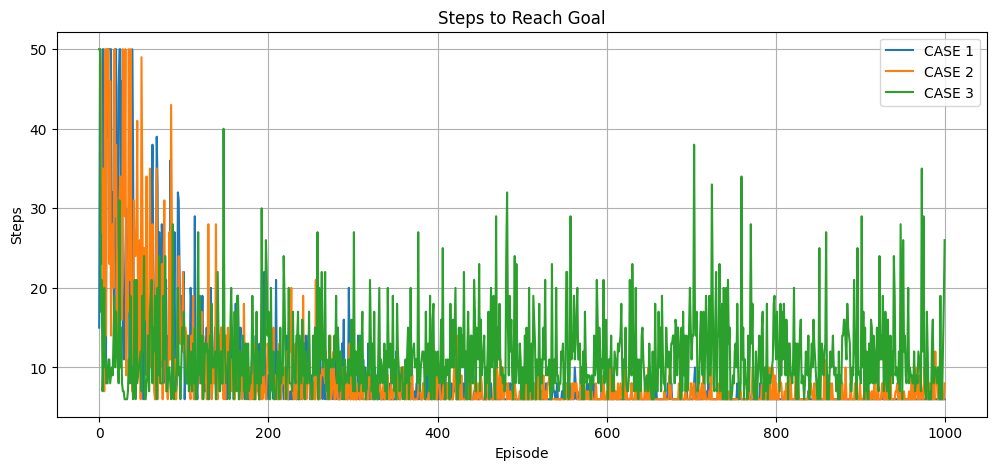

In [ ]:
plt.figure(figsize=(12, 5))
for label, steps in all_steps.items():
    plt.plot(steps, label=label)
plt.title("Steps to Reach Goal")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

In [ ]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.grid(True)
    ax.set_title("Agent Path (Q-learning)")

    # Draw the goal
    goal_rect = patches.Rectangle((3, 3), 1, 1, linewidth=1, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # Red dot for the agent
    agent, = ax.plot([], [], 'ro', markersize=18)

    def update(frame):
        x, y = path[frame]
        # ✅ wrap in list so matplotlib doesn't throw
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


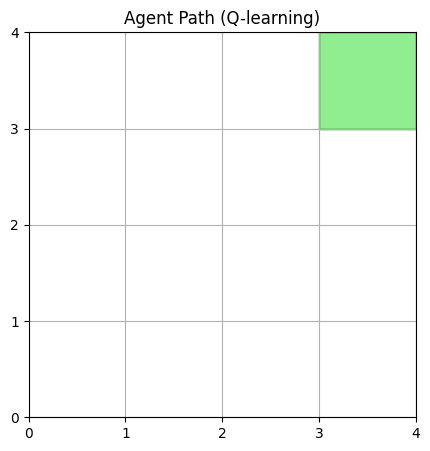

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()                 # ✅ this displays it in Colab


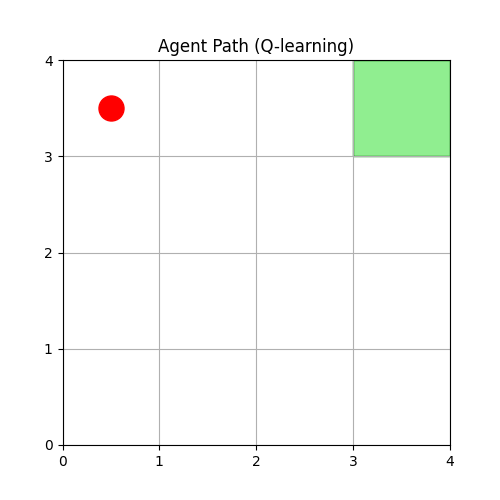

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
print("Agent path:", path)

Agent path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


In [ ]:
path = get_policy_path(q_table)
print("Agent path:", path)


Agent path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


In [ ]:
print(q_table)


[[ 2.02602798  3.21342812  0.46194942  1.99929924]
 [ 3.15795318  4.4351875   4.19630951  2.01726098]
 [ 4.41214844  5.60518295  5.72125     3.19701825]
 [-1.4628125   2.1021405   7.07143707 -0.9875    ]
 [-2.14637129 -2.12155469  2.94163235 -2.33541406]
 [-1.92163281  5.72035434 -1.73171875 -2.2504668 ]
 [ 4.39101353  7.075       4.97534935  4.30590515]
 [ 4.38170864  7.05837097  8.5         5.67264648]
 [-1.4628125  -1.409375    5.11637909 -1.4628125 ]
 [-1.60828125  0.3421875  -1.1125     -1.2190625 ]
 [ 0.37354492  8.48888934 -0.5        -0.5       ]
 [ 6.6015625   8.35937468 10.          6.76641204]
 [-1.10625     6.90419312 -0.9875     -0.9875    ]
 [-0.9875      8.47009277 -0.5        -0.5       ]
 [-0.5         9.99755859  0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid cells as boxes
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

    # ✅ Highlight goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Agent as red circle
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


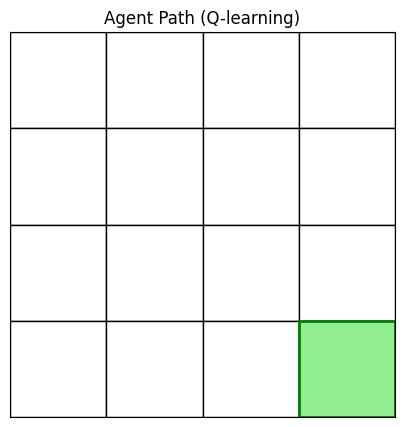

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()                 # ✅ this displays it in Colab


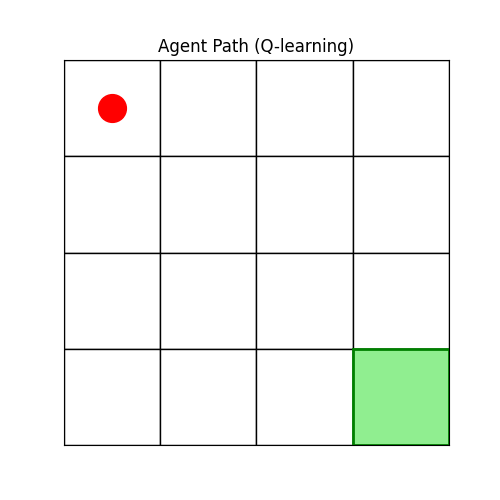

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


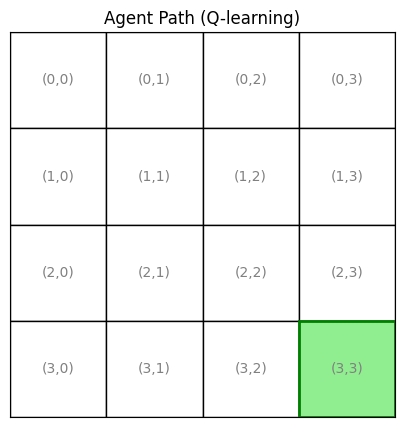

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

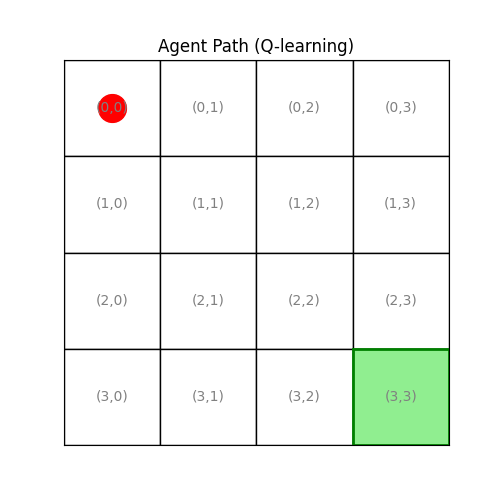

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw grid and coordinates
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # ✅ Highlight goal cell (3,3) in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # ✅ Add reward label "+10" inside goal box
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # 🔴 Agent as red dot
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


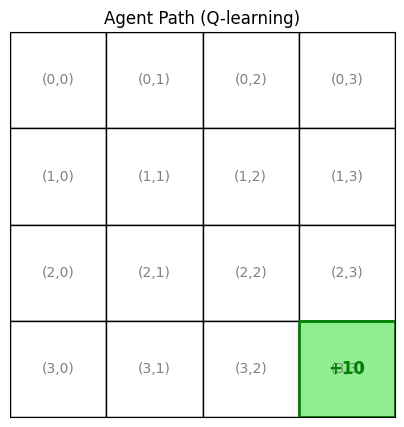

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

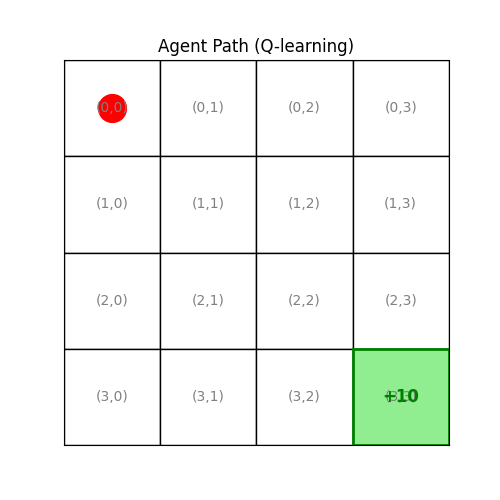

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
# Bad path: loops around before reaching (3,3)
penalty_path = [
    (0, 0), (0, 1), (0, 2), (0, 1),  # backtrack
    (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)
]


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate_path(path, penalty_path=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path: Optimal (RED) vs Penalty (BLUE)")

    # Draw 4x4 grid and coordinates
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # Highlight goal cell (3,3)
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # Create agent markers
    agent, = ax.plot([], [], 'ro', markersize=20)     # Red dot for optimal agent
    bad_agent, = ax.plot([], [], 'bo', markersize=15) # Blue dot for bad path

    def update(frame):
        if frame < len(path):
            x, y = path[frame]
            agent.set_data([y + 0.5], [3.5 - x])

        if penalty_path and frame < len(penalty_path):
            x2, y2 = penalty_path[frame]
            bad_agent.set_data([y2 + 0.5], [3.5 - x2])

        return agent, bad_agent

    anim = FuncAnimation(fig, update, frames=max(len(path), len(penalty_path) if penalty_path else 0),
                         interval=500, repeat=False)
    return anim


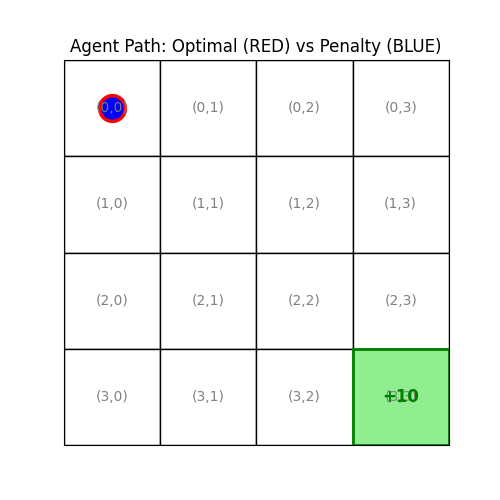

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path, env, q_table, penalty_path=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 5)  # taller to fit text
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path: Optimal (RED) vs Penalty (BLUE)")

    # Grid + labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # Goal + +10 label
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # Agents
    agent, = ax.plot([], [], 'ro', markersize=20)
    bad_agent, = ax.plot([], [], 'bo', markersize=15)

    # Text outputs
    reward_text = ax.text(0.2, 4.5, "", fontsize=12, color='red')
    penalty_text = ax.text(0.2, 4.2, "", fontsize=12, color='blue')

    def update(frame):
        if frame < len(path):
            x, y = path[frame]
            agent.set_data([y + 0.5], [3.5 - x])

            # Reward for optimal agent
            if frame > 0:
                prev = path[frame - 1]
                s = prev[0] * 4 + prev[1]
                a = np.argmax(q_table[s])
                env.reset()  # reset before taking step
                env.agent_pos = list(prev)
                _, reward, _ = env.step(a)
                reward_text.set_text(f"Reward is: {reward}")
            else:
                reward_text.set_text("")

        if penalty_path and frame < len(penalty_path):
            x2, y2 = penalty_path[frame]
            bad_agent.set_data([y2 + 0.5], [3.5 - x2])

            # Penalty for bad agent: always -1 unless goal
            if (x2, y2) == (3, 3):
                penalty_text.set_text("Penalty is: +10")
            else:
                penalty_text.set_text("Penalty is: -1")

        return agent, bad_agent, reward_text, penalty_text

    anim = FuncAnimation(fig, update,
                         frames=max(len(path), len(penalty_path) if penalty_path else 0),
                         interval=600, repeat=False)
    return anim


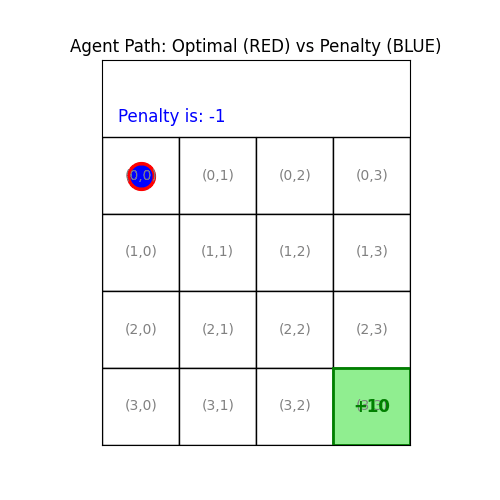

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")